In [4]:
import pandas as pd
input_file = 'C:\Users\hp\codes\output_file_with_features.csv' # the path of the file
out = pd.read_csv(input_file) # to read the file

out.head() 

,Word,POS,Previous Word,Previous POS,Next Word,Next POS,Word Length,Frequency,Root
0,The,DT,NaN,NaN,Fulton,NNP,3,225,the
1,Fulton,NNP,The,DT,County,NNP,6,14,fulton
2,County,NNP,Fulton,NNP,Grand,NNP,6,21,county
3,Grand,NNP,County,NNP,Jury,NN,5,1,grand
4,Jury,NNP,Grand,NNP,said,VBD,4,1,jury


In [5]:
out.info() # gives me no. of rows and some info about column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15863 entries, 0 to 15862
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Word           15863 non-null  object
 1   POS            15863 non-null  object
 2   Previous Word  15862 non-null  object
 3   Previous POS   15862 non-null  object
 4   Next Word      15862 non-null  object
 5   Next POS       15862 non-null  object
 6   Word Length    15863 non-null  int64 
 7   Frequency      15863 non-null  int64 
 8   Root           15863 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


In [6]:
out.describe() # describe the data

,Word Length,Frequency
count,15863.000000,15863.000000
mean,4.754334,251.326231
std,2.639640,441.531332
min,1.000000,1.000000
25%,3.000000,4.000000
50%,4.000000,23.000000
75%,6.000000,292.000000
max,16.000000,1536.000000


In [24]:
out.columns

Index(['Word', 'POS', 'Previous Word', 'Previous POS', 'Next Word', 'Next POS',
       'Word Length', 'Frequency', 'Root'],
      dtype='object')

<Axes: xlabel='Word', ylabel='POS'>

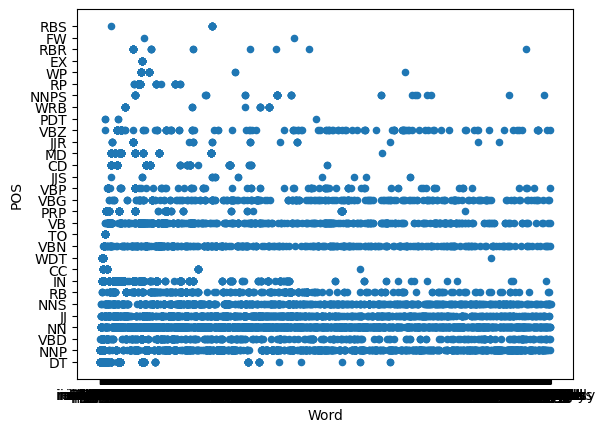

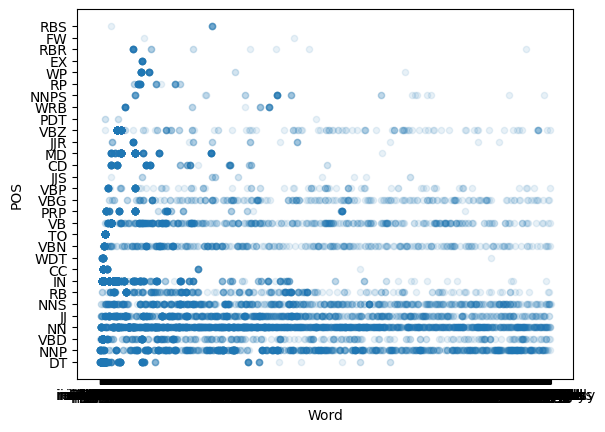

In [26]:
import pandas as pd

input_file = r'C:\Users\hp\codes\output_file_with_features.csv' # the path of the file
out = pd.read_csv(input_file) # to read the file
out.plot(kind='scatter', x='Word', y='POS')
out.plot(kind='scatter', x='Word', y='POS', alpha= 0.1)

In [6]:
# cleaning the data
import pandas as pd
import re

input_file = r'C:\Users\hp\codes\output_file_with_features.csv'
out = pd.read_csv(input_file)

# Function to check if a string contains punctuation
def contains_punctuation(cell):
    return bool(re.search(r'[^\w\s]', str(cell))) 

# Function to check if any cell in a row contains punctuation
def row_contains_punctuation(row):
    return any(contains_punctuation(cell) for cell in row) # Recursion 

# Drop rows where any cell contains punctuation
out_cleaned = out[~out.apply(row_contains_punctuation, axis=1)]

In [2]:
# to split the data set to 20% testing and 80% training
import pandas as pd
import re

input_file = r'C:\Users\hp\codes\output_file_with_features.csv'
out = pd.read_csv(input_file)

from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(out, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

12690
3173


In [42]:
# one hot encoding vectorizaion

import pandas as pd
import re

input_file = r'C:\Users\hp\codes\outputfile.csv'
out = pd.read_csv(input_file)

# Word
from sklearn.feature_extraction.text import CountVectorizer
words = out['Word']  
vectorizer = CountVectorizer(binary=True)
x = vectorizer.fit_transform(words)
x_array = x.toarray()
one_hot_encoded_features = pd.DataFrame(x_array, columns=vectorizer.get_feature_names_out())
print(one_hot_encoded_features,'\n')


# POS
pos = out['POS'] 
vectorizer = CountVectorizer(binary=True)
y = vectorizer.fit_transform(pos)
y_array = y.toarray()
one_hot_encoded_features = pd.DataFrame(y_array, columns=vectorizer.get_feature_names_out())
print(one_hot_encoded_features,'\n')

# root
root = out['Root']  
vectorizer = CountVectorizer(binary=True)
y = vectorizer.fit_transform(root)
y_array = y.toarray()
one_hot_encoded_features = pd.DataFrame(y_array, columns=vectorizer.get_feature_names_out())
print(one_hot_encoded_features)

       abe  able  about  above  absolute  absolutely  absorb  abuse  accept  \
0        0     0      0      0         0           0       0      0       0   
1        0     0      0      0         0           0       0      0       0   
2        0     0      0      0         0           0       0      0       0   
3        0     0      0      0         0           0       0      0       0   
4        0     0      0      0         0           0       0      0       0   
...    ...   ...    ...    ...       ...         ...     ...    ...     ...   
15858    0     0      0      0         0           0       0      0       0   
15859    0     0      0      0         0           0       0      0       0   
15860    0     0      0      0         0           0       0      0       0   
15861    0     0      0      0         0           0       0      0       0   
15862    0     0      0      0         0           0       0      0       0   

       acceptable  ...  years  yesterday  yet  yiel

In [44]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
input_file = r'C:\Users\test\Desktop\outputfile.csv'
out = pd.read_csv(input_file)

# word
words = out['Word']
vectorizer = TfidfVectorizer()
tfidf_encoded = vectorizer.fit_transform(words)
print(vectorizer.get_feature_names_out())
print(tfidf_encoded.toarray(),'\n')

# pos
pos = out['POS']
vectorizer = TfidfVectorizer()
tfidf_encoded = vectorizer.fit_transform(pos)
print(vectorizer.get_feature_names_out())
print(tfidf_encoded.toarray(),'\n')

# root
root = out['Root']
vectorizer = TfidfVectorizer()
tfidf_encoded = vectorizer.fit_transform(root)
print(vectorizer.get_feature_names_out())
print(tfidf_encoded.toarray())

['abe' 'able' 'about' ... 'younger' 'youth' 'zurich']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

['cc' 'cd' 'dt' 'ex' 'fw' 'in' 'jj' 'jjr' 'jjs' 'md' 'nn' 'nnp' 'nnps'
 'nns' 'pdt' 'prp' 'rb' 'rbr' 'rbs' 'rp' 'to' 'vb' 'vbd' 'vbg' 'vbn' 'vbp'
 'vbz' 'wdt' 'wp' 'wrb']
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

['abe' 'able' 'about' ... 'young' 'youth' 'zurich']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
# correlation measures
import pandas as pd

input_file = r"C:\Users\test\Desktop\outputfile.csv"
out = pd.read_csv(input_file)

# Convert 'POS' column to numeric, if it's not already
out['POS'] = pd.to_numeric(out['POS'], errors='coerce')

# Select only numerical columns (including 'POS')
numeric_df = out.select_dtypes(include=['number'])

# Check if 'POS' column is in numeric_df
if 'POS' not in numeric_df.columns:
    print("The 'POS' column could not be converted to numeric or does not exist.")
else:
    # Calculate correlation matrix
    corr_matrix = numeric_df.corr()

    # Print correlation of 'POS' with other columns (sorted by absolute value)
    print("Correlation with 'POS':")
    print(corr_matrix['POS'].sort_values(ascending=False))

    # Calculate the mean of each column, ignoring NaN values (default behavior)
    mean_ignoring_nan = numeric_df.mean()
    print("\nMean Ignoring NaN Values:")
    print(mean_ignoring_nan)
    print("\nCorrelation Matrix for Mean Ignoring NaN Values:")
    print(numeric_df.corr())

    # Calculate the mean of each column, treating NaN as zero
    mean_treating_nan_as_zero = numeric_df.fillna(0).mean()
    print("\nMean Treating NaN as Zero:")
    print(mean_treating_nan_as_zero)
    print("\nCorrelation Matrix for Mean Treating NaN as Zero:")
    print(numeric_df.fillna(0).corr())

    # Calculate the median of each column, ignoring NaN values (default behavior)
    median_ignoring_nan = numeric_df.median()
    print("\nMedian Ignoring NaN Values:")
    print(median_ignoring_nan)
    print("\nCorrelation Matrix for Median Ignoring NaN Values:")
    print(numeric_df.corr())

    # Calculate the median of each column, treating NaN as zero
    median_treating_nan_as_zero = numeric_df.fillna(0).median()
    print("\nMedian Treating NaN as Zero:")
    print(median_treating_nan_as_zero)
    print("\nCorrelation Matrix for Median Treating NaN as Zero:")
    print(numeric_df.fillna(0).corr())


Correlation with 'POS':
POS           NaN
Word Length   NaN
Frequency     NaN
Name: POS, dtype: float64

Mean Ignoring NaN Values:
POS                  NaN
Word Length      4.52700
Frequency      275.11344
dtype: float64

Correlation Matrix for Mean Ignoring NaN Values:
             POS  Word Length  Frequency
POS          NaN          NaN        NaN
Word Length  NaN     1.000000  -0.515983
Frequency    NaN    -0.515983   1.000000

Mean Treating NaN as Zero:
POS              0.00000
Word Length      4.52700
Frequency      275.11344
dtype: float64

Correlation Matrix for Mean Treating NaN as Zero:
             POS  Word Length  Frequency
POS          NaN          NaN        NaN
Word Length  NaN     1.000000  -0.515983
Frequency    NaN    -0.515983   1.000000

Median Ignoring NaN Values:
POS             NaN
Word Length     4.0
Frequency      24.0
dtype: float64

Correlation Matrix for Median Ignoring NaN Values:
             POS  Word Length  Frequency
POS          NaN          NaN      

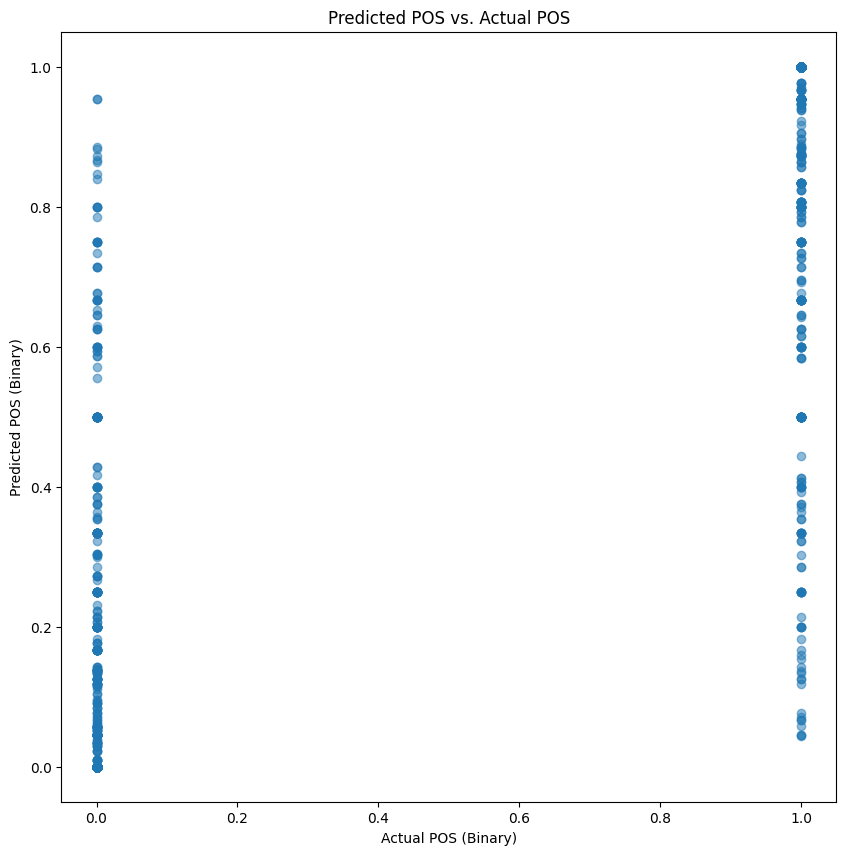

In [1]:
# linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer

auto = pd.read_csv(r'C:\Users\test\Desktop\outputfile.csv')

# Vectorize 'Word' column using CountVectorizer
word_vectorizer = CountVectorizer(binary=True)
X_word_vect = word_vectorizer.fit_transform(auto['Word']).toarray()

# Vectorize 'POS' column using CountVectorizer
pos_vectorizer = CountVectorizer(binary=True)
Y_pos_vect = pos_vectorizer.fit_transform(auto['POS']).toarray()

# Model training for 'Word' and 'POS'
word_POS_pred = LinearRegression()
word_POS_pred.fit(X_word_vect, Y_pos_vect)

# Choose a random sample of data points for visualization
sample_size = 1000
random_indices = np.random.choice(X_word_vect.shape[0], sample_size, replace=False)
X_sample = X_word_vect[random_indices]
Y_sample = Y_pos_vect[random_indices]

# Predict POS values for the sample
predicted_Y_sample = word_POS_pred.predict(X_sample)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(Y_sample, predicted_Y_sample, alpha=0.5)
plt.title('Predicted POS vs. Actual POS')
plt.xlabel('Actual POS (Binary)')
plt.ylabel('Predicted POS (Binary)')
plt.show()


In [2]:
# support vector machine

import pandas as pd
import numpy as np

dataset=pd.read_csv(r'C:\Users\hp\codes\outputfile.csv')
x=dataset.drop(['POS'],axis=1)
y=dataset['POS']

#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
# One-hot encode categorical variables in the features
x_encoded = pd.get_dummies(x)

# Display 
print(x_encoded)


#training the svm model on the training set
from sklearn.svm import SVC
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.25, random_state=0)

# Initialize the SVM classifier
classifier = SVC(kernel='linear', random_state=0)

# Train the classifier using the training data
classifier.fit(x_train, y_train)

#predicting the test set results(evaluation model)
y_pred=classifier.predict(x_test)
print((y_pred))


           Word Previous Word Previous POS    Next Word Next POS  Word Length  \
883        suit          test           NN           to       TO            4   
251    counties           the           DT           in       IN            8   
593       Party         State           NN     Chairman      NNP            5   
771    expected            is          VBZ           to       TO            8   
1422    members     committee           NN      taunted      VBN            7   
...         ...           ...          ...          ...      ...          ...   
763   assistant            an           DT         more      RBR            9   
835      toward          work           NN  adjournment       NN            6   
1216  Education            of           IN       should       MD            9   
559   announced    Hartsfield           NN         that       IN            9   
684           a            is          VBZ        state       NN            1   

      Frequency       Root 

In [3]:
# naive bayes 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

input_path = r'C:\Users\hp\codes\outputfile.csv' # path of file
out = pd.read_csv(input_path)  # to read the file
inputs = out.drop('POS', axis='columns')  # to drop pos column
target = out.POS

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_inputs = pd.DataFrame(encoder.fit_transform(inputs), columns=encoder.get_feature_names_out(inputs.columns))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_inputs, target, test_size=0.2, random_state=42)  # divided the data to 80% train & 20% test
from sklearn.naive_bayes import GaussianNB
# Choose the model
model = GaussianNB()
# Train the model
model.fit(X_train, y_train)
# Test the model
score = model.score(X_test, y_test)
print(f"Model score: {score}")
# Predict on a subset of the test data
X_test_subset = X_test[0:10]
y_test_subset = y_test[0:10]
predictions = model.predict(X_test_subset)
print("Actual values:")
print(y_test_subset)
print("\nPredictions:")
print(predictions)


d:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: 0.7287066246056783
Actual values:
468     VBD
332     VBZ
1434     VB
380     VBD
99       CC
1532    VBG
1117     VB
1029    VBD
938      VB
303      RB
Name: POS, dtype: object

Predictions:
['VBZ' 'VBG' 'VB' 'VBD' 'CC' 'VBN' 'VBG' 'VBD' 'VB' 'RB']


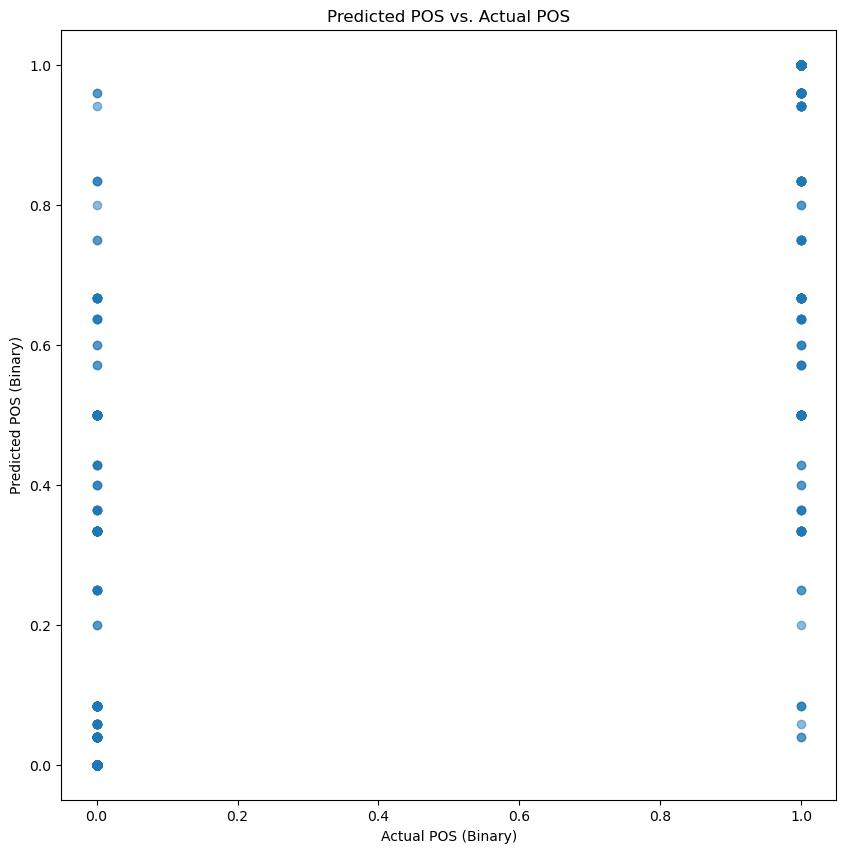

Testing with 5-fold cross-validation:
Average test error: 1.1173440133677187e+25

Testing with 10-fold cross-validation:
Average test error: 7.655052201522209e+24

Testing with 20-fold cross-validation:
Average test error: 6.160947092049814e+24



In [4]:
# test using k folds for linear regression --> 5 , 10 , 20

# linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold

# Load the data
auto = pd.read_csv(r'C:\Users\hp\codes\outputfile.csv')

# Vectorize 'Word' column using CountVectorizer
word_vectorizer = CountVectorizer(binary=True)
X_word_vect = word_vectorizer.fit_transform(auto['Word']).toarray()

# Vectorize 'POS' column using CountVectorizer
pos_vectorizer = CountVectorizer(binary=True)
Y_pos_vect = pos_vectorizer.fit_transform(auto['POS']).toarray()

# Model training for 'Word' and 'POS'
word_POS_pred = LinearRegression()
word_POS_pred.fit(X_word_vect, Y_pos_vect)

# Choose a random sample of data points for visualization
sample_size = 1000
random_indices = np.random.choice(X_word_vect.shape[0], sample_size, replace=False)
X_sample = X_word_vect[random_indices]
Y_sample = Y_pos_vect[random_indices]

# Predict POS values for the sample
predicted_Y_sample = word_POS_pred.predict(X_sample)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(Y_sample, predicted_Y_sample, alpha=0.5)
plt.title('Predicted POS vs. Actual POS')
plt.xlabel('Actual POS (Binary)')
plt.ylabel('Predicted POS (Binary)')
plt.show()

# Test code adjusted
# Choose the number of folds: 5, 10, and 20
for fold_count in [5, 10, 20]:
    kf = KFold(n_splits=fold_count, shuffle=True, random_state=42)
    
    # Lists to store performance metrics for each fold
    test_errors = []
    
    print(f"Testing with {fold_count}-fold cross-validation:")
    
    # Iterate through folds and train/evaluate your model
    for train_index, test_index in kf.split(X_word_vect):
        X_train, X_test = X_word_vect[train_index], X_word_vect[test_index]
        y_train, y_test = Y_pos_vect[train_index], Y_pos_vect[test_index]

        # Model training
        word_POS_pred = LinearRegression()
        word_POS_pred.fit(X_train, y_train)

        # Predict POS values for the test set
        predicted_y_test = word_POS_pred.predict(X_test)

        # Calculate error
        # For now, let's assume the error is just the mean squared error
        # You can replace this with your actual error calculation
        error = np.mean((y_test - predicted_y_test) ** 2)
        test_errors.append(error)

    # Calculate average performance
    average_test_error = sum(test_errors) / len(test_errors)
    
    print(f"Average test error: {average_test_error}")
    print()


In [5]:
# test using k folds for svm --> 5 , 10 , 20

# support vector machine
import pandas as pd
import numpy as np

dataset=pd.read_csv(r'C:\Users\hp\codes\outputfile.csv')
x=dataset.drop(['POS'],axis=1)
y=dataset['POS']

#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
# One-hot encode categorical variables in the features
x_encoded = pd.get_dummies(x)

# Display 
print(x_encoded)


#training the svm model on the training set
from sklearn.svm import SVC
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.25, random_state=0)

# Initialize the SVM classifier
classifier = SVC(kernel="linear", random_state=0)

# Train the classifier using the training data
classifier.fit(x_train, y_train)

#predicting the test set results(evaluation model)
y_pred=classifier.predict(x_test)
print((y_pred))


# test
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score  # Adjusted import statement

# Choose the number of folds: 5, 10, and 20
for fold_count in [5, 10, 20]:
    kf = KFold(n_splits=fold_count, shuffle=True, random_state=42)
    
    # Lists to store performance metrics for each fold
    test_accuracies = []  # Changed to accuracy score

    print(f"Testing with {fold_count}-fold cross-validation:")
    
    # Iterate through folds and train/evaluate your model
    for train_index, test_index in kf.split(x_encoded):  # Adjusted variable names
        x_train, x_test = x_encoded.iloc[train_index], x_encoded.iloc[test_index]  # Adjusted variable names
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Adjusted variable names

        # Initialize the SVM classifier (no need to re-initialize in each fold)
        classifier = SVC(kernel='linear', random_state=0)

        # Train the classifier using the training data
        classifier.fit(x_train, y_train)

        # Predict POS values for the test set
        y_pred = classifier.predict(x_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        test_accuracies.append(accuracy)

    # Calculate average performance
    average_test_accuracy = sum(test_accuracies) / len(test_accuracies)
    
    print(f"Average test accuracy: {average_test_accuracy}")
    print()


           Word Previous Word Previous POS    Next Word Next POS  Word Length  \
883        suit          test           NN           to       TO            4   
251    counties           the           DT           in       IN            8   
593       Party         State           NN     Chairman      NNP            5   
771    expected            is          VBZ           to       TO            8   
1422    members     committee           NN      taunted      VBN            7   
...         ...           ...          ...          ...      ...          ...   
763   assistant            an           DT         more      RBR            9   
835      toward          work           NN  adjournment       NN            6   
1216  Education            of           IN       should       MD            9   
559   announced    Hartsfield           NN         that       IN            9   
684           a            is          VBZ        state       NN            1   

      Frequency       Root 

In [6]:
# test using k folds for naive bayes --> 5 , 10 , 20

# naive bayes 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

input_path = r'C:\Users\hp\codes\outputfile.csv' # path of file
out = pd.read_csv(input_path)  # to read the file
inputs = out.drop('POS', axis='columns')  # to drop pos column
target = out.POS

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_inputs = pd.DataFrame(encoder.fit_transform(inputs), columns=encoder.get_feature_names_out(inputs.columns))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_inputs, target, test_size=0.2, random_state=42)  # divided the data to 80% train & 20% test
from sklearn.naive_bayes import GaussianNB
# Choose the model
model = GaussianNB()
# Train the model
model.fit(X_train, y_train)
# Test the model
score = model.score(X_test, y_test)
print(f"Model score: {score}")
# Predict on a subset of the test data
X_test_subset = X_test[0:10]
y_test_subset = y_test[0:10]
predictions = model.predict(X_test_subset)
print("Actual values:")
print(y_test_subset)
print("\nPredictions:")
print(predictions)



# test
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Choose the number of folds: 5, 10, and 20
for fold_count in [5, 10, 20]:
    kf = KFold(n_splits=fold_count, shuffle=True, random_state=42)
    
    # Lists to store performance metrics for each fold
    test_accuracies = []  # Adjusted variable name
    
    print(f"Testing with {fold_count}-fold cross-validation:")
    
    # Iterate through folds and train/evaluate your model
    for train_index, test_index in kf.split(encoded_inputs):  # Adjusted variable name
        X_train, X_test = encoded_inputs.iloc[train_index], encoded_inputs.iloc[test_index]  # Adjusted variable names
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]  # Adjusted variable names

        # Choose the model (Your Naive Bayes model remains here)
        model = GaussianNB()

        # Train the model
        model.fit(X_train, y_train)

        # Test the model
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        test_accuracies.append(accuracy)

    # Calculate average performance
    average_test_accuracy = sum(test_accuracies) / len(test_accuracies)
    
    print(f"Average test accuracy: {average_test_accuracy}")
    print()


d:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: 0.7287066246056783
Actual values:
468     VBD
332     VBZ
1434     VB
380     VBD
99       CC
1532    VBG
1117     VB
1029    VBD
938      VB
303      RB
Name: POS, dtype: object

Predictions:
['VBZ' 'VBG' 'VB' 'VBD' 'CC' 'VBN' 'VBG' 'VBD' 'VB' 'RB']
Testing with 5-fold cross-validation:
Average test accuracy: 0.7298067324202371

Testing with 10-fold cross-validation:
Average test accuracy: 0.7474723350051748

Testing with 20-fold cross-validation:
Average test accuracy: 0.7525158227848103



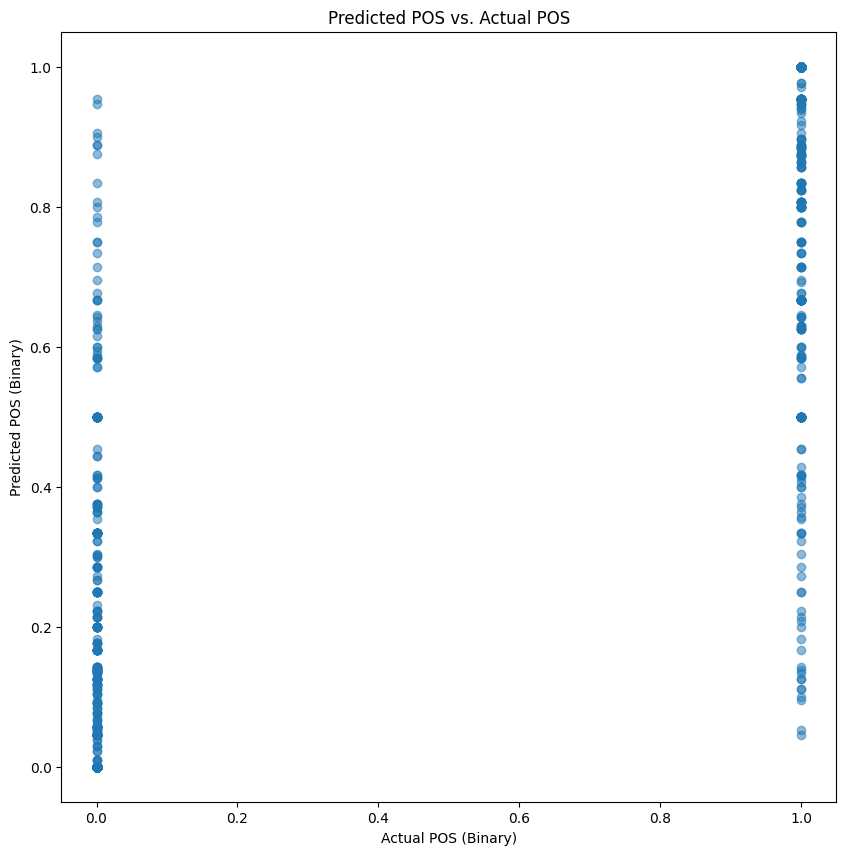

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29000
           1       0.95      0.94      0.94      1000

    accuracy                           1.00     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       1.00      1.00      1.00     30000

Confusion Matrix:
 [[28946    54]
 [   61   939]]
AUC-ROC Score: 0.9996778965517241


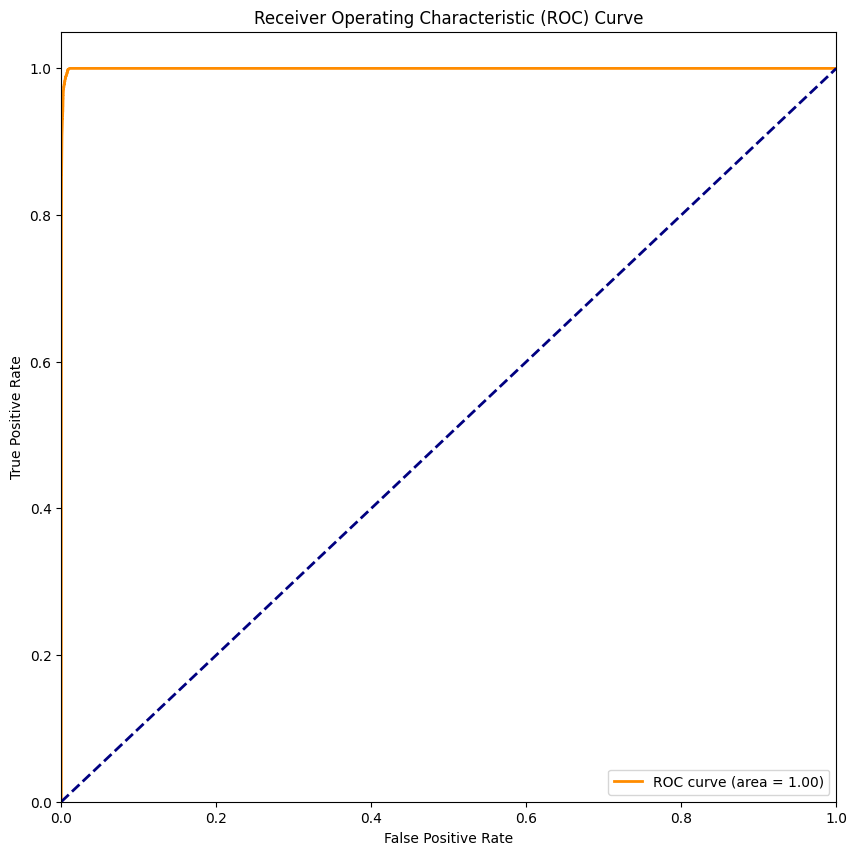

In [6]:
# evaluation for linear regression

# linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import Binarizer

# Load the data
auto = pd.read_csv(r'C:\Users\hp\codes\outputfile.csv')

# Vectorize 'Word' column using CountVectorizer
word_vectorizer = CountVectorizer(binary=True)
X_word_vect = word_vectorizer.fit_transform(auto['Word']).toarray()

# Vectorize 'POS' column using CountVectorizer
pos_vectorizer = CountVectorizer(binary=True)
Y_pos_vect = pos_vectorizer.fit_transform(auto['POS']).toarray()

# Model training for 'Word' and 'POS'
word_POS_pred = LinearRegression()
word_POS_pred.fit(X_word_vect, Y_pos_vect)

# Choose a random sample of data points for visualization
sample_size = 1000
random_indices = np.random.choice(X_word_vect.shape[0], sample_size, replace=False)
X_sample = X_word_vect[random_indices]
Y_sample = Y_pos_vect[random_indices]

# Predict POS values for the sample
predicted_Y_sample = word_POS_pred.predict(X_sample)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(Y_sample, predicted_Y_sample, alpha=0.5)
plt.title('Predicted POS vs. Actual POS')
plt.xlabel('Actual POS (Binary)')
plt.ylabel('Predicted POS (Binary)')
plt.show()

# Evaluation
# Binarize the predicted and actual values
binarizer = Binarizer(threshold=0.5)
Y_sample_binary = binarizer.fit_transform(Y_sample.flatten().reshape(-1, 1))
predicted_Y_sample_binary = binarizer.transform(predicted_Y_sample.flatten().reshape(-1, 1))

# Calculate precision, recall, accuracy, F-measure
class_report = classification_report(Y_sample_binary, predicted_Y_sample_binary)
print('Classification Report:\n', class_report)

# Calculate confusion matrix
confusion_mat = confusion_matrix(Y_sample_binary, predicted_Y_sample_binary)
print('Confusion Matrix:\n', confusion_mat)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(Y_sample_binary, predicted_Y_sample.flatten())  # Use predicted_Y_sample directly
print('AUC-ROC Score:', auc_roc)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(Y_sample_binary, predicted_Y_sample.flatten())  # Use predicted_Y_sample directly
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv(r'C:\Users\hp\codes\outputfile.csv')
x = dataset.drop(['POS'], axis=1)
y = dataset['POS']

# Check for and encode categorical variables
x = pd.get_dummies(x, drop_first=True)

# Ensure there are no missing values
x.fillna(x.mean(), inplace=True)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize the SVM classifier
classifier = SVC(kernel='linear', random_state=0, probability=True)
classifier.fit(x_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred_prob = classifier.predict_proba(x_test)[:, 1]

# Print unique values in y_test to ensure it's binary
print(f"Unique values in y_test: {np.unique(y_test)}")

# Evaluation
# Calculate precision, recall, accuracy, F-measure
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mat)

# Calculate AUC-ROC score
if len(np.unique(y_test)) == 2:
    # Binary classification case
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    print('AUC-ROC Score:', auc_roc)

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Target variable is not binary. ROC-AUC score calculation is not applicable.")


Unique values in y_test: ['CC' 'CD' 'DT' 'EX' 'IN' 'JJ' 'JJR' 'MD' 'NN' 'NNP' 'NNPS' 'NNS' 'PDT'
 'PRP' 'RB' 'RP' 'TO' 'VB' 'VBD' 'VBG' 'VBN' 'VBP' 'VBZ' 'WDT' 'WP' 'WRB']
Classification Report:
               precision    recall  f1-score   support

          CC       1.00      1.00      1.00         5
          CD       1.00      0.86      0.92         7
          DT       0.94      0.98      0.96        51
          EX       0.33      1.00      0.50         1
          IN       0.82      0.96      0.89        56
          JJ       0.88      0.35      0.50        20
         JJR       1.00      0.50      0.67         2
          MD       1.00      0.71      0.83         7
          NN       0.48      0.91      0.63        70
         NNP       0.95      0.57      0.71        37
        NNPS       1.00      1.00      1.00         2
         NNS       0.73      0.47      0.57        17
         PDT       0.00      0.00      0.00         1
         PRP       1.00      0.60      0.75    

d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# evaluation for naive bayes

# naive bayes 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

input_path = r'C:\Users\hp\codes\outputfile.csv' # path of file
out = pd.read_csv(input_path)  # to read the file
inputs = out.drop('POS', axis='columns')  # to drop pos column
target = out.POS

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_inputs = pd.DataFrame(encoder.fit_transform(inputs), columns=encoder.get_feature_names_out(inputs.columns))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_inputs, target, test_size=0.2, random_state=42)  # divided the data to 80% train & 20% test
from sklearn.naive_bayes import GaussianNB
# Choose the model
model = GaussianNB()
# Train the model
model.fit(X_train, y_train)
# Test the model
score = model.score(X_test, y_test)
print(f"Model score: {score}")
# Predict on a subset of the test data
X_test_subset = X_test[0:10]
y_test_subset = y_test[0:10]
predictions = model.predict(X_test_subset)
print("Actual values:")
print(y_test_subset)
print("\nPredictions:")
print(predictions)


# evaluation
from sklearn.preprocessing import Binarizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the predicted and actual values
binarizer = Binarizer(threshold=0.5)
y_test_binary = binarizer.fit_transform(y_test.values.reshape(-1, 1))
y_pred_binary = binarizer.transform(y_pred.reshape(-1, 1))

# Calculate precision, recall, accuracy, F-measure
class_report = classification_report(y_test_binary, y_pred_binary)
print('Classification Report:\n', class_report)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_binary, y_pred_binary)
print('Confusion Matrix:\n', confusion_mat)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test_binary, y_pred)  
print('AUC-ROC Score:', auc_roc)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


d:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: 0.7287066246056783
Actual values:
468     VBD
332     VBZ
1434     VB
380     VBD
99       CC
1532    VBG
1117     VB
1029    VBD
938      VB
303      RB
Name: POS, dtype: object

Predictions:
['VBZ' 'VBG' 'VB' 'VBD' 'CC' 'VBN' 'VBG' 'VBD' 'VB' 'RB']


ValueError: could not convert string to float: 'VBD'